## IMAGE SEGMENTATION AND CLASSIFICATION USING MACHINE LEARNING RANDOM FOREST

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, segmentation, feature, future
from sklearn.ensemble import RandomForestClassifier
from functools import partial
import rasterio as rio
import cv2

In [7]:
from skimage import io
image=io.imread('E:\Machine_Learning\IMAGE SEGMENTATION\Flevo123.tif')

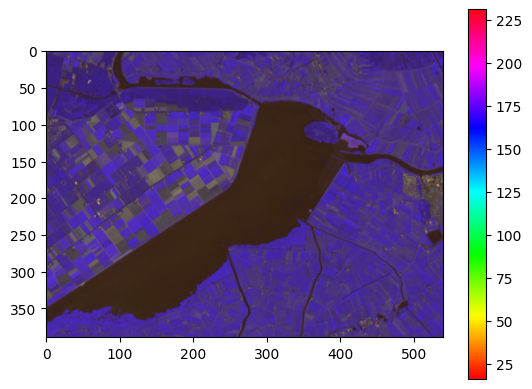

In [9]:
plt.imshow(image,cmap="hsv")
plt.colorbar()

(array([[180., 158.,  48., ...,   0.,   0.,   0.],
        [177., 173.,  37., ...,   0.,   0.,   0.],
        [172., 170.,  43., ...,   0.,   0.,   0.],
        ...,
        [ 79., 272.,  37., ...,   0.,   0.,   0.],
        [ 90., 260.,  36., ...,   0.,   0.,   0.],
        [ 83., 275.,  29., ...,   0.,   0.,   0.]]),
 array([ 50. ,  68.1,  86.2, 104.3, 122.4, 140.5, 158.6, 176.7, 194.8,
        212.9, 231. ]),
 <a list of 540 BarContainer objects>)

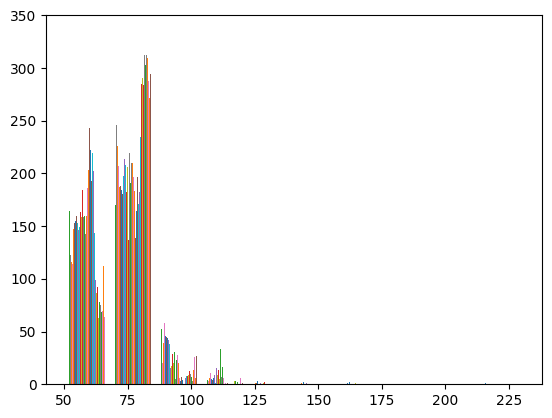

In [16]:
plt.show() 
plt.hist(array)


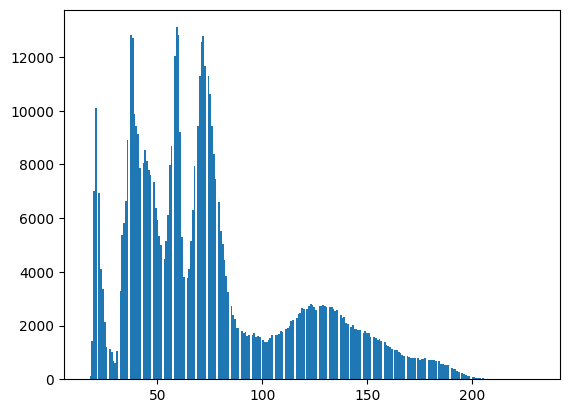

In [10]:
plt.hist(image.ravel(),bins=256)
plt.show()

# Trainable segmentation using local features and random forests

A pixel-based segmentation is computed here using local features based on
local intensity, edges and textures at different scales and different classes. 
Mask is used to identify different regions and classes.
The pixels of the mask are used to train a random-forest classifier.
 Unlabeled pixels are then labeled from the prediction of the classifier.

In [11]:
img = image[:400, :500]
training_labels = np.zeros(img.shape[:2], dtype=np.uint8)
# training_labels[0:20] = 1
# training_labels[30:50, 95:100] = 3
training_labels[180:200, 220:223] = 3
training_labels[310:350, 100:170] = 4
# training_labels[150:170, 450:480] = 4
training_labels[50:100, 420:500] = 5

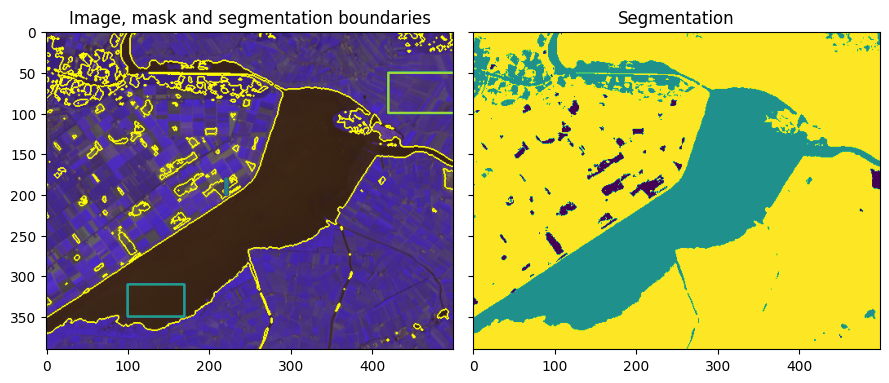

In [14]:

sigma_min = 1
sigma_max = 3
features_func = partial(feature.multiscale_basic_features,
                        intensity=True, edges=False, texture=True,
                        sigma_min=sigma_min, sigma_max=sigma_max,
                        channel_axis=-1)
features = features_func(img)
clf = RandomForestClassifier(n_estimators=50, n_jobs=-1,
                             max_depth=10, max_samples=0.05)
clf = future.fit_segmenter(training_labels, features, clf)
result = future.predict_segmenter(features, clf)

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9, 4))
ax[0].imshow(segmentation.mark_boundaries(img, result, mode='thick'))
ax[0].contour(training_labels)
ax[0].set_title('Image, mask and segmentation boundaries')
ax[1].imshow(result)
ax[1].set_title('Segmentation')
fig.tight_layout()

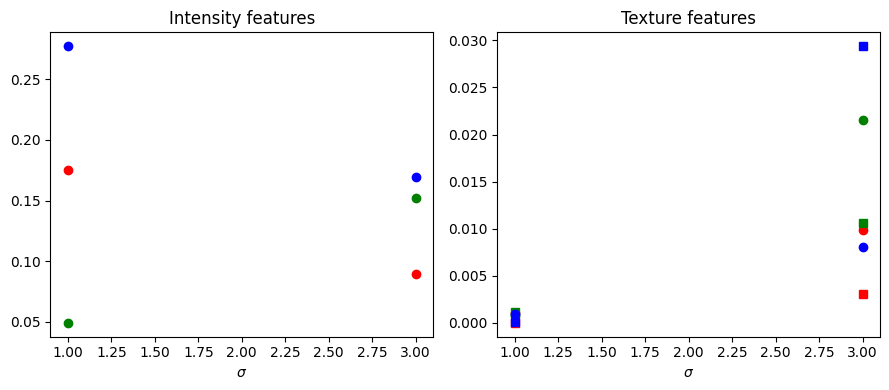

In [15]:

fig, ax = plt.subplots(1, 2, figsize=(9, 4))
l = len(clf.feature_importances_)
feature_importance = (
        clf.feature_importances_[:l//3],
        clf.feature_importances_[l//3:2*l//3],
        clf.feature_importances_[2*l//3:])
sigmas = np.logspace(
        np.log2(sigma_min), np.log2(sigma_max),
        num=int(np.log2(sigma_max) - np.log2(sigma_min) + 1),
        base=2, endpoint=True)
for ch, color in zip(range(3), ['r', 'g', 'b']):
    ax[0].plot(sigmas, feature_importance[ch][::3], 'o', color=color)
    ax[0].set_title("Intensity features")
    ax[0].set_xlabel("$\\sigma$")
for ch, color in zip(range(3), ['r', 'g', 'b']):
    ax[1].plot(sigmas, feature_importance[ch][1::3], 'o', color=color)
    ax[1].plot(sigmas, feature_importance[ch][2::3], 's', color=color)
    ax[1].set_title("Texture features")
    ax[1].set_xlabel("$\\sigma$")

fig.tight_layout()

## Fitting new images

If we have several images of similar objects acquired in similar conditions,
we can use the classifier trained with `fit_segmenter` to segment other
images. In the example below we just use a different part of the image.

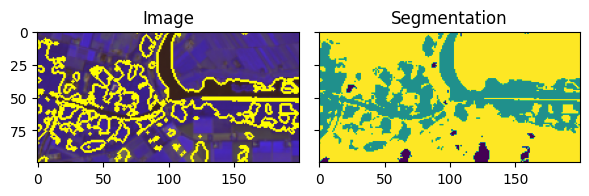

In [19]:
image=io.imread('E:\Machine_Learning\IMAGE SEGMENTATION\Flevo123.tif')
img_new = image[:100, :200]
features_new = features_func(img_new)
result_new = future.predict_segmenter(features_new, clf)
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(6, 4))
ax[0].imshow(segmentation.mark_boundaries(img_new, result_new, mode='thick'))
ax[0].set_title('Image')
ax[1].imshow(result_new)
ax[1].set_title('Segmentation')
fig.tight_layout()

plt.show()